In [4]:
# Requires GenePattern Notebook: pip install genepattern-notebook
import gp
import genepattern

# Username and password removed for security reasons.
genepattern.display(genepattern.session.register("https://cloud.genepattern.org/gp", "", ""))

GPAuthWidget()

ERROR! Session/line number was not unique in database. History logging moved to new session 2


In [7]:
import urllib.request
import urllib.parse
import os
import pandas as pd
import cuzcatlan as cusca
import numpy as np
import genepattern
import ccalnoir as ccal

def std_filter(df):
    std = df.std(axis=1)
    min_std = 0.1*std.mean() # Filter genes that are below 10th percentile
    # mean = df.mean(axis=1)
    new_std = std[std > min_std]
    print("{} genes were filtered out -- they had a Standard Deviation lower than {:2.2f} (mean std was ~{})".format(std.count() - new_std.count(), min_std, int(std.mean()) ))
    print("New gene lengths is {}".format(new_std.count()))
    filtered_df = df.iloc[new_std.index]
    return filtered_df


def sort_TCGA_samples(df, make_cls=True, name='sorted_cls.cls'):
    cols = list(df.columns)
    temp_cols = [sample[::-1] for sample in cols]
    temp_cols = sorted(temp_cols)
    if make_cls:
        cusca.list2cls(np.array([int(sample[:2][::-1][0]) for sample in temp_cols]), name_of_out=name,sep=' ')
    temp_cols = [sample[::-1] for sample in temp_cols]
    return df[temp_cols]


@genepattern.build_ui(parameters={
    "cancer_type": {
        "default": "CHOL",
        "type": "choice",
        "choices": {
            "Adrenocortical Carcinoma (ACC)":"ACC",
            "Bladder Urothelial Carcinoma (BLCA)": "BLCA",
            "Breast Invasive Carcinoma (BRCA)": "BRCA",
            "Cervical Squamous Cell Carcinoma and Endocervical Adenocarcinoma (CESC)": "CESC",
            "Cholangiocarcinoma (CHOL)": "CHOL",
            "Colon Adenocarcinoma (COAD)": "COAD",
            "Lymphoid Neoplasm Diffuse Large B-cell Lymphoma (DLBC)": "DLBC",
            "Esophageal Carcinoma (ESCA)": "ESCA",
            "Glioblastoma Multiforme (GBM)":"GBM",
            "Head and Neck Squamous Cell Carcinoma (HNSC)":"HNSC",
            "Kidney Chromophobe (KICH)":"KICH",
            "Kidney Renal Clear Cell Carcinoma (KIRC)":"KIRC",
            "Kidney Renal Papillary Cell Carcinoma (KIRP)":"KIRP",
            "Acute Myeloid Leukemia (LAML)":"LAML",
            "Brain Lower Grade Glioma (LGG)":"LGG",
            "Liver Hepatocellular Carcinoma (LIHC)":"LIHC",
            "Lung Adenocarcinoma (LUAD)":"LUAD",
            "Lung Squamous Cell Carcinoma (LUSC)":"LUSC",
            "Mesothelioma (MESO)":"MESO",
            "Ovarian Serous Cystadenocarcinoma (OV)":"OV",
            "Pancreatic Adenocarcinoma (PAAD)":"PAAD",
            "Pheochromocytoma and Paraganglioma (PCPG)":"PCPG",
            "Prostate Adenocarcinoma (PRAD)":"PRAD",
            "Rectum Adenocarcinoma (READ)":"READ",
            "Sarcoma (SARC)":"SARC",
            "Skin Cutaneous Melanoma (SKCM)":"SKCM",
            "Stomach Adenocarcinoma (STAD)":"STAD",
            "Testicular Germ Cell Tumors (TGCT)":"TGCT",
            "Thyroid Carcinoma (THCA)":"THCA",
            "Thymoma (THYM)":"THYM",
            "Uterine Corpus Endometrial Carcinoma (UCEC)":"UCEC",
            "Uterine Carcinosarcoma (UCS)":"UCS",
            "Uveal Melanoma (UVM)":"UVM",
        }
    },
    "output_var":{
        "hide":True}
})
def load_TCGA_RNASeq_counts(cancer_type, load_cls=True, filter_dataset=True):
    global selected_type
    selected_type = cancer_type
    global was_filtered
    was_filtered = filter_dataset
    gct_url = f"https://datasets.genepattern.org/data/TCGA_HTSeq_counts/{cancer_type}/{cancer_type}_TCGA.gct"
    cls_url = f"https://datasets.genepattern.org/data/TCGA_HTSeq_counts/{cancer_type}/{cancer_type}_TCGA.cls"
    
    if filter_dataset:
        file_list = []
    else:
        file_list = [gct_url]
    print("Importing:",gct_url)
    urllib.request.urlretrieve(gct_url, os.path.basename(urllib.parse.urlparse(gct_url).path))
    print('\tdone importing!')
    if load_cls:
        if not(filter_dataset):
            file_list.append(cls_url)
        urllib.request.urlretrieve(cls_url, os.path.basename(urllib.parse.urlparse(cls_url).path))
    if filter_dataset:
        print('Starting the filtering process.')
        filtered_name = os.path.basename(urllib.parse.urlparse(gct_url).path).strip('.gct')+'.filtered.gct'
        filtered_df = std_filter(pd.read_table(gct_url,header=2))
        filtered_df.index = filtered_df['Name']
        filtered_df = sort_TCGA_samples(filtered_df.drop(['Name','Description'],axis=1,inplace=False), name = filtered_name.replace(".gct",".cls"))
        cusca.df2gct(filtered_df, name=filtered_name, use_index=True)
        file_list.append(filtered_name)
        file_list.append(filtered_name.replace(".gct",".cls"))
    return genepattern.GPUIOutput(files=file_list)

<IPython.core.display.Javascript object>

UIBuilder(function_import='nbtools.tool(id="load_TCGA_RNASeq_counts", origin="Notebook").function_or_method', …

In [10]:
import nbtools
from gp.data import GCT

## attempt 0

In [42]:
# The code below will only run if pandas is installed: http://pandas.pydata.org
import nbtools
from gp.data import GCT
chol_tcga_gct_dataframe = GCT(nbtools.open("https://datasets.genepattern.org/data/TCGA_HTSeq_counts/CHOL/CHOL_TCGA.gct"))
chol_tcga_gct_dataframe

,,TCGA-W5-AA36-01,TCGA-W5-AA2H-01,TCGA-ZU-A8S4-11,TCGA-WD-A7RX-01,TCGA-3X-AAVC-01,TCGA-3X-AAVE-01,TCGA-ZH-A8Y4-01,TCGA-W5-AA2W-01,TCGA-W5-AA2Q-11,TCGA-W5-AA2G-01,...,TCGA-ZH-A8Y6-01,TCGA-W6-AA0S-01,TCGA-W5-AA34-11,TCGA-W5-AA2R-11,TCGA-W5-AA33-01,TCGA-W5-AA2U-11,TCGA-YR-A95A-01,TCGA-W5-AA2I-01,TCGA-W5-AA2I-11,TCGA-W5-AA34-01
Name,Description,,,,,,,,,,,,,,,,,,,,,
TSPAN6,ENSG00000000003.13,2504,226,4107,9646,3960,4798,3720,1261,1921,1777,...,576,3632,4832,3534,11342,2476,10086,4245,4689,8150
TNMD,ENSG00000000005.5,0,5,0,1,1,0,0,1,3,0,...,0,1,0,2,1,1,10,0,0,0
DPM1,ENSG00000000419.11,1272,1146,741,1266,1250,1492,1129,1465,466,1299,...,1314,1486,981,719,976,655,1273,788,651,1770
SCYL3,ENSG00000000457.12,504,602,312,1317,1127,1110,875,1565,335,653,...,1384,558,556,344,1538,346,1026,714,361,1202
C1orf112,ENSG00000000460.15,123,162,170,451,217,368,316,590,76,204,...,254,185,70,74,390,34,166,307,41,378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSGR0000275287,ENSGR0000275287.3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSGR0000276543,ENSGR0000276543.3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSGR0000277120,ENSGR0000277120.3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


44058 genes were filtered out -- they had a Standard Deviation lower than 64.05 (mean std was ~640)
New gene lengths is 16425


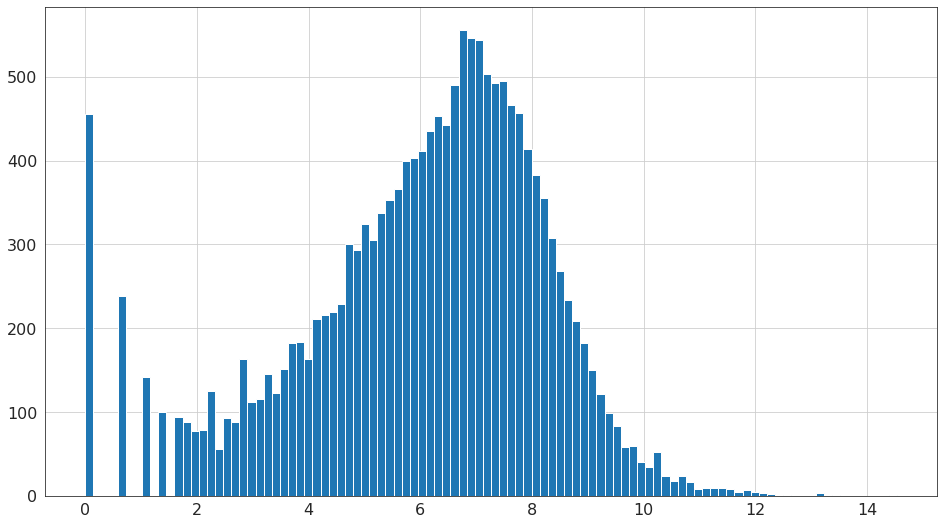

In [52]:
temp = std_filter(chol_tcga_gct_dataframe)['TCGA-W5-AA36-01'].apply(np.log1p).hist(bins=100,figsize=(16,9))

In [5]:
deseq2_task = gp.GPTask(genepattern.session.get(0), 'urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00362')
deseq2_job_spec = deseq2_task.make_job_spec()
deseq2_job_spec.set_parameter("input.file", "https://datasets.genepattern.org/data/TCGA_HTSeq_counts/CHOL/CHOL_TCGA.gct")
deseq2_job_spec.set_parameter("cls.file", "https://datasets.genepattern.org/data/TCGA_HTSeq_counts/CHOL/CHOL_TCGA.cls")
deseq2_job_spec.set_parameter("confounding.variable.cls.file", "")
deseq2_job_spec.set_parameter("output.file.base", "<input.file_basename>")
deseq2_job_spec.set_parameter("qc.plot.format", "skip")
deseq2_job_spec.set_parameter("fdr.threshold", "0.1")
deseq2_job_spec.set_parameter("top.N.count", "20")
deseq2_job_spec.set_parameter("random.seed", "779948241")
deseq2_job_spec.set_parameter("job.memory", "2 Gb")
deseq2_job_spec.set_parameter("job.queue", "gp-cloud-default")
deseq2_job_spec.set_parameter("job.cpuCount", "1")
deseq2_job_spec.set_parameter("job.walltime", "02:00:00")
genepattern.display(deseq2_task)


job184267 = gp.GPJob(genepattern.session.get(0), 184267)
genepattern.display(job184267)

GPTaskWidget(lsid='urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00362')

GPJobWidget(job_number=184267)

In [36]:
# The code below will only run if pandas is installed: http://pandas.pydata.org
from gp.data import GCT
chol_tcga_11_vs_01_normalized_counts_gct_184267 = GCT(job184267.get_file("CHOL_TCGA.11.vs.01.normalized_counts.gct"))

,,TCGA-W5-AA36-01,TCGA-W5-AA2H-01,TCGA-ZU-A8S4-11,TCGA-WD-A7RX-01,TCGA-3X-AAVC-01,TCGA-3X-AAVE-01,TCGA-ZH-A8Y4-01,TCGA-W5-AA2W-01,TCGA-W5-AA2Q-11,TCGA-W5-AA2G-01,...,TCGA-ZH-A8Y6-01,TCGA-W6-AA0S-01,TCGA-W5-AA34-11,TCGA-W5-AA2R-11,TCGA-W5-AA33-01,TCGA-W5-AA2U-11,TCGA-YR-A95A-01,TCGA-W5-AA2I-01,TCGA-W5-AA2I-11,TCGA-W5-AA34-01
Name,Description,,,,,,,,,,,,,,,,,,,,,
TSPAN6,NaN,2597.127188,199.691144,9460.507418,7746.671593,3641.970273,3801.983218,2930.855694,1092.939236,4909.182856,1623.773320,...,387.043996,2890.819485,8266.895192,7288.939957,7927.795205,5441.141116,9302.011358,4190.907054,10266.890898,7114.381392
TNMD,NaN,0.000000,4.417946,0.000000,0.803097,0.919689,0.000000,0.000000,0.866724,7.666605,0.000000,...,0.000000,0.795930,0.000000,4.125037,0.698977,2.197553,9.222696,0.000000,0.000000,0.000000
DPM1,NaN,1319.307421,1012.593148,1706.899439,1016.720530,1149.611829,1182.275732,889.498946,1269.750976,1190.879339,1186.990176,...,882.944115,1182.752686,1678.357654,1482.950716,682.201386,1439.397185,1174.049223,777.958718,1425.409677,1545.086511
SCYL3,NaN,522.744450,531.920659,718.694501,1057.678467,1036.490025,879.575109,689.381380,1356.423398,856.104246,596.693291,...,929.980712,444.129205,951.240424,709.506323,1075.026364,760.353322,946.248627,704.901681,790.434552,1049.262139
C1orf112,NaN,127.574538,143.141440,391.596363,362.196650,199.572613,291.606883,248.965161,511.367287,194.220665,186.409543,...,170.675651,147.247138,119.760485,152.626360,272.600964,74.716800,153.096756,303.087978,89.772345,329.967628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HERC2P7,NaN,0.000000,0.000000,0.000000,0.000000,0.919689,1.584820,1.575729,3.466897,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.936286,0.000000,0.000000
SNORA50A,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.710864,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
LINC01144,NaN,32.152932,57.433294,43.766652,44.973420,49.663231,42.790140,37.029628,19.934657,91.999262,29.240713,...,23.518298,22.286053,73.567155,51.562960,19.571351,120.865413,18.445392,56.273664,72.255790,61.105116


In [37]:
df = chol_tcga_11_vs_01_normalized_counts_gct_184267
df.index = chol_tcga_11_vs_01_normalized_counts_gct_184267.index.droplevel(1)
display(df.head())
len(df)

,TCGA-W5-AA36-01,TCGA-W5-AA2H-01,TCGA-ZU-A8S4-11,TCGA-WD-A7RX-01,TCGA-3X-AAVC-01,TCGA-3X-AAVE-01,TCGA-ZH-A8Y4-01,TCGA-W5-AA2W-01,TCGA-W5-AA2Q-11,TCGA-W5-AA2G-01,...,TCGA-ZH-A8Y6-01,TCGA-W6-AA0S-01,TCGA-W5-AA34-11,TCGA-W5-AA2R-11,TCGA-W5-AA33-01,TCGA-W5-AA2U-11,TCGA-YR-A95A-01,TCGA-W5-AA2I-01,TCGA-W5-AA2I-11,TCGA-W5-AA34-01
Name,,,,,,,,,,,,,,,,,,,,,
TSPAN6,2597.127188,199.691144,9460.507418,7746.671593,3641.970273,3801.983218,2930.855694,1092.939236,4909.182856,1623.773320,...,387.043996,2890.819485,8266.895192,7288.939957,7927.795205,5441.141116,9302.011358,4190.907054,10266.890898,7114.381392
TNMD,0.000000,4.417946,0.000000,0.803097,0.919689,0.000000,0.000000,0.866724,7.666605,0.000000,...,0.000000,0.795930,0.000000,4.125037,0.698977,2.197553,9.222696,0.000000,0.000000,0.000000
DPM1,1319.307421,1012.593148,1706.899439,1016.720530,1149.611829,1182.275732,889.498946,1269.750976,1190.879339,1186.990176,...,882.944115,1182.752686,1678.357654,1482.950716,682.201386,1439.397185,1174.049223,777.958718,1425.409677,1545.086511
SCYL3,522.744450,531.920659,718.694501,1057.678467,1036.490025,879.575109,689.381380,1356.423398,856.104246,596.693291,...,929.980712,444.129205,951.240424,709.506323,1075.026364,760.353322,946.248627,704.901681,790.434552,1049.262139
C1orf112,127.574538,143.141440,391.596363,362.196650,199.572613,291.606883,248.965161,511.367287,194.220665,186.409543,...,170.675651,147.247138,119.760485,152.626360,272.600964,74.716800,153.096756,303.087978,89.772345,329.967628


46920

In [31]:
def std_filter(df):
    std = df.std(axis=1)
    min_std = 0.1*std.mean() # Filter genes that are below 10th percentile
    # mean = df.mean(axis=1)
    new_std = std[std > min_std]
    print("{} genes were filtered out -- they had a Standard Deviation lower than {:2.2f} (mean std was ~{})".format(std.count() - new_std.count(), min_std, int(std.mean()) ))
    print("New gene lengths is {}".format(new_std.count()))
    filtered_df = df.loc[new_std.index]
    return filtered_df

In [38]:
filtered_df = std_filter(df)

32262 genes were filtered out -- they had a Standard Deviation lower than 100.74 (mean std was ~1007)
New gene lengths is 14658


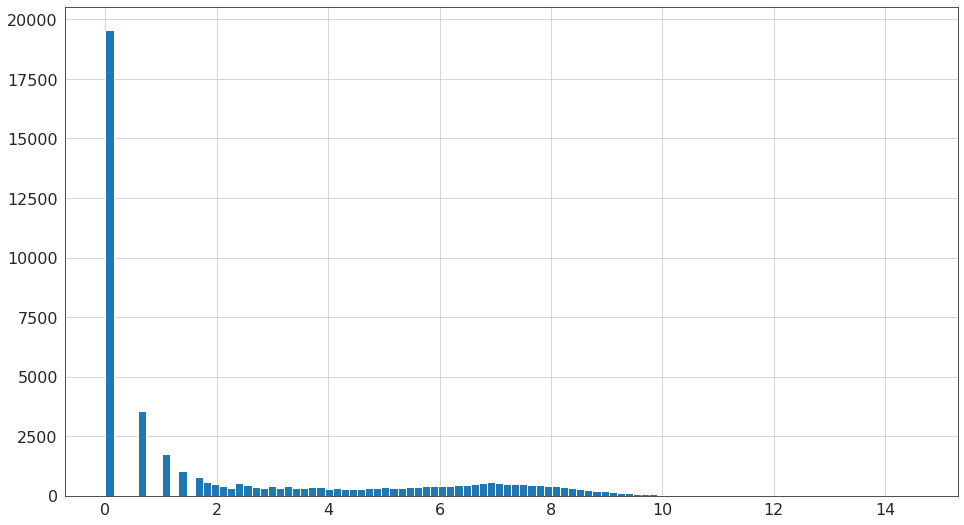

In [55]:
ax = df['TCGA-W5-AA36-01'].apply(np.log1p).hist(bins=100,figsize=(16,9))

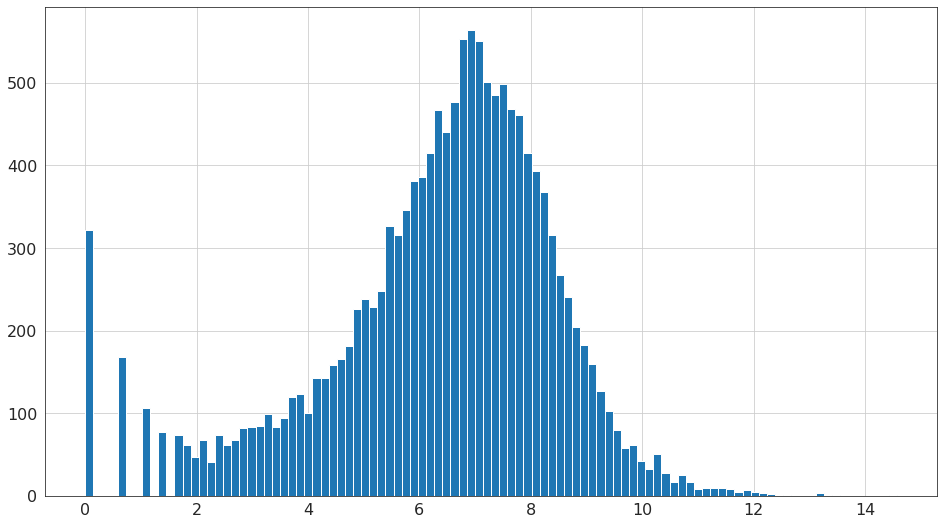

In [53]:
ax = filtered_df['TCGA-W5-AA36-01'].apply(np.log1p).hist(bins=100,figsize=(16,9))

In [6]:
gsea_task = gp.GPTask(genepattern.session.get(0), 'urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00072')
gsea_job_spec = gsea_task.make_job_spec()
gsea_job_spec.set_parameter("expression.dataset", "")
gsea_job_spec.set_parameter("gene.sets.database", "")
gsea_job_spec.set_parameter("number.of.permutations", "1000")
gsea_job_spec.set_parameter("phenotype.labels", "")
gsea_job_spec.set_parameter("target.profile", "")
gsea_job_spec.set_parameter("collapse.dataset", "Collapse")
gsea_job_spec.set_parameter("permutation.type", "phenotype")
gsea_job_spec.set_parameter("chip.platform.file", "")
gsea_job_spec.set_parameter("scoring.scheme", "weighted")
gsea_job_spec.set_parameter("metric.for.ranking.genes", "Signal2Noise")
gsea_job_spec.set_parameter("gene.list.sorting.mode", "real")
gsea_job_spec.set_parameter("gene.list.ordering.mode", "descending")
gsea_job_spec.set_parameter("max.gene.set.size", "500")
gsea_job_spec.set_parameter("min.gene.set.size", "15")
gsea_job_spec.set_parameter("collapsing.mode.for.probe.sets.with.more.than.one.match", "Max_probe")
gsea_job_spec.set_parameter("normalization.mode", "meandiv")
gsea_job_spec.set_parameter("randomization.mode", "no_balance")
gsea_job_spec.set_parameter("omit.features.with.no.symbol.match", "true")
gsea_job_spec.set_parameter("make.detailed.gene.set.report", "true")
gsea_job_spec.set_parameter("median.for.class.metrics", "false")
gsea_job_spec.set_parameter("number.of.markers", "100")
gsea_job_spec.set_parameter("plot.graphs.for.the.top.sets.of.each.phenotype", "20")
gsea_job_spec.set_parameter("random.seed", "timestamp")
gsea_job_spec.set_parameter("save.random.ranked.lists", "false")
gsea_job_spec.set_parameter("create.svgs", "false")
gsea_job_spec.set_parameter("selected.gene.sets", "")
gsea_job_spec.set_parameter("output.file.name", "<expression.dataset_basename>.zip")
gsea_job_spec.set_parameter("alt.delim", "")
gsea_job_spec.set_parameter("create.zip", "true")
gsea_job_spec.set_parameter("create.gcts", "false")
gsea_job_spec.set_parameter("dev.mode", "false")
gsea_job_spec.set_parameter("job.memory", "8 Gb")
gsea_job_spec.set_parameter("job.queue", "gp-cloud-default")
gsea_job_spec.set_parameter("job.cpuCount", "1")
gsea_job_spec.set_parameter("job.walltime", "02:00:00")
genepattern.display(gsea_task)


GPTaskWidget(lsid='urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00072')

## attempt 1

In [14]:
# The code below will only run if pandas is installed: http://pandas.pydata.org
raw_counts = GCT(nbtools.open("https://datasets.genepattern.org/data/TCGA_HTSeq_counts/CHOL/CHOL_TCGA.gct"))
display(raw_counts.head())
len(raw_counts)

,,TCGA-W5-AA36-01,TCGA-W5-AA2H-01,TCGA-ZU-A8S4-11,TCGA-WD-A7RX-01,TCGA-3X-AAVC-01,TCGA-3X-AAVE-01,TCGA-ZH-A8Y4-01,TCGA-W5-AA2W-01,TCGA-W5-AA2Q-11,TCGA-W5-AA2G-01,...,TCGA-ZH-A8Y6-01,TCGA-W6-AA0S-01,TCGA-W5-AA34-11,TCGA-W5-AA2R-11,TCGA-W5-AA33-01,TCGA-W5-AA2U-11,TCGA-YR-A95A-01,TCGA-W5-AA2I-01,TCGA-W5-AA2I-11,TCGA-W5-AA34-01
Name,Description,,,,,,,,,,,,,,,,,,,,,
TSPAN6,ENSG00000000003.13,2504,226,4107,9646,3960,4798,3720,1261,1921,1777,...,576,3632,4832,3534,11342,2476,10086,4245,4689,8150
TNMD,ENSG00000000005.5,0,5,0,1,1,0,0,1,3,0,...,0,1,0,2,1,1,10,0,0,0
DPM1,ENSG00000000419.11,1272,1146,741,1266,1250,1492,1129,1465,466,1299,...,1314,1486,981,719,976,655,1273,788,651,1770
SCYL3,ENSG00000000457.12,504,602,312,1317,1127,1110,875,1565,335,653,...,1384,558,556,344,1538,346,1026,714,361,1202
C1orf112,ENSG00000000460.15,123,162,170,451,217,368,316,590,76,204,...,254,185,70,74,390,34,166,307,41,378


60483

In [15]:
deseq2_task = gp.GPTask(genepattern.session.get(0), 'urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00362')
deseq2_job_spec = deseq2_task.make_job_spec()
deseq2_job_spec.set_parameter("input.file", "https://datasets.genepattern.org/data/TCGA_HTSeq_counts/CHOL/CHOL_TCGA.gct")
deseq2_job_spec.set_parameter("cls.file", "https://datasets.genepattern.org/data/TCGA_HTSeq_counts/CHOL/CHOL_TCGA.cls")
deseq2_job_spec.set_parameter("confounding.variable.cls.file", "")
deseq2_job_spec.set_parameter("output.file.base", "<input.file_basename>")
deseq2_job_spec.set_parameter("qc.plot.format", "skip")
deseq2_job_spec.set_parameter("fdr.threshold", "0.1")
deseq2_job_spec.set_parameter("top.N.count", "20")
deseq2_job_spec.set_parameter("random.seed", "779948241")
deseq2_job_spec.set_parameter("job.memory", "2 Gb")
deseq2_job_spec.set_parameter("job.queue", "gp-cloud-default")
deseq2_job_spec.set_parameter("job.cpuCount", "1")
deseq2_job_spec.set_parameter("job.walltime", "02:00:00")
genepattern.display(deseq2_task)


job184348 = gp.GPJob(genepattern.session.get(0), 184348)
genepattern.display(job184348)

GPTaskWidget(lsid='urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00362')

In [69]:
deseq2 = GCT(job184348.get_file("CHOL_TCGA.11.vs.01.normalized_counts.gct"))
deseq2.index = deseq2.index.droplevel(1)
display(deseq2.head())
len(deseq2)

,TCGA-W5-AA36-01,TCGA-W5-AA2H-01,TCGA-ZU-A8S4-11,TCGA-WD-A7RX-01,TCGA-3X-AAVC-01,TCGA-3X-AAVE-01,TCGA-ZH-A8Y4-01,TCGA-W5-AA2W-01,TCGA-W5-AA2Q-11,TCGA-W5-AA2G-01,...,TCGA-ZH-A8Y6-01,TCGA-W6-AA0S-01,TCGA-W5-AA34-11,TCGA-W5-AA2R-11,TCGA-W5-AA33-01,TCGA-W5-AA2U-11,TCGA-YR-A95A-01,TCGA-W5-AA2I-01,TCGA-W5-AA2I-11,TCGA-W5-AA34-01
Name,,,,,,,,,,,,,,,,,,,,,
TSPAN6,2597.127188,199.691144,9460.507418,7746.671593,3641.970273,3801.983218,2930.855694,1092.939236,4909.182856,1623.773320,...,387.043996,2890.819485,8266.895192,7288.939957,7927.795205,5441.141116,9302.011358,4190.907054,10266.890898,7114.381392
TNMD,0.000000,4.417946,0.000000,0.803097,0.919689,0.000000,0.000000,0.866724,7.666605,0.000000,...,0.000000,0.795930,0.000000,4.125037,0.698977,2.197553,9.222696,0.000000,0.000000,0.000000
DPM1,1319.307421,1012.593148,1706.899439,1016.720530,1149.611829,1182.275732,889.498946,1269.750976,1190.879339,1186.990176,...,882.944115,1182.752686,1678.357654,1482.950716,682.201386,1439.397185,1174.049223,777.958718,1425.409677,1545.086511
SCYL3,522.744450,531.920659,718.694501,1057.678467,1036.490025,879.575109,689.381380,1356.423398,856.104246,596.693291,...,929.980712,444.129205,951.240424,709.506323,1075.026364,760.353322,946.248627,704.901681,790.434552,1049.262139
C1orf112,127.574538,143.141440,391.596363,362.196650,199.572613,291.606883,248.965161,511.367287,194.220665,186.409543,...,170.675651,147.247138,119.760485,152.626360,272.600964,74.716800,153.096756,303.087978,89.772345,329.967628


46920

In [16]:
voomnormalize_task = gp.GPTask(genepattern.session.get(0), 'urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00355')
voomnormalize_job_spec = voomnormalize_task.make_job_spec()
voomnormalize_job_spec.set_parameter("input.file", "https://datasets.genepattern.org/data/TCGA_HTSeq_counts/CHOL/CHOL_TCGA.gct")
voomnormalize_job_spec.set_parameter("cls.file", "https://datasets.genepattern.org/data/TCGA_HTSeq_counts/CHOL/CHOL_TCGA.cls")
voomnormalize_job_spec.set_parameter("output.file", "<input.file_basename>.VOOM.gct")
voomnormalize_job_spec.set_parameter("expression.value.filter.threshold", "1")
voomnormalize_job_spec.set_parameter("job.memory", "2 Gb")
voomnormalize_job_spec.set_parameter("job.queue", "gp-cloud-default")
voomnormalize_job_spec.set_parameter("job.cpuCount", "1")
voomnormalize_job_spec.set_parameter("job.walltime", "02:00:00")
genepattern.display(voomnormalize_task)


job184349 = gp.GPJob(genepattern.session.get(0), 184349)
genepattern.display(job184349)

GPTaskWidget(lsid='urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00355')

In [60]:
voom_normalized = GCT(job184349.get_file("CHOL_TCGA.VOOM.gct"))
voom_normalized.index = voom_normalized.index.droplevel(1)
display(voom_normalized.head())
len(voom_normalized)

,TCGA-W5-AA36-01,TCGA-W5-AA2H-01,TCGA-ZU-A8S4-11,TCGA-WD-A7RX-01,TCGA-3X-AAVC-01,TCGA-3X-AAVE-01,TCGA-ZH-A8Y4-01,TCGA-W5-AA2W-01,TCGA-W5-AA2Q-11,TCGA-W5-AA2G-01,...,TCGA-ZH-A8Y6-01,TCGA-W6-AA0S-01,TCGA-W5-AA34-11,TCGA-W5-AA2R-11,TCGA-W5-AA33-01,TCGA-W5-AA2U-11,TCGA-YR-A95A-01,TCGA-W5-AA2I-01,TCGA-W5-AA2I-11,TCGA-W5-AA34-01
Name,,,,,,,,,,,,,,,,,,,,,
TSPAN6,5.857548,2.227403,7.696242,7.488413,6.335080,6.425130,5.965908,4.595863,6.806531,5.164253,...,3.081595,6.028912,7.502167,7.332180,7.521976,6.950870,7.703689,6.523981,7.833964,7.309703
DPM1,4.880691,4.567056,5.226500,4.559255,4.671903,4.740277,4.246096,4.812116,4.764247,4.712360,...,4.270716,4.739868,5.202458,5.035740,3.984001,5.033235,4.718134,4.095229,4.986367,5.106972
SCYL3,3.545952,3.638853,3.979910,4.616210,4.522525,4.313756,3.878590,4.907346,4.288683,3.720662,...,4.345567,3.327578,4.383851,3.973249,4.639834,4.113495,4.407069,3.953052,4.136597,4.548852
C1orf112,1.515608,1.748331,3.105825,3.071205,2.148485,2.722283,2.410689,3.500732,2.155902,2.044576,...,1.901940,1.737440,1.403164,1.764058,2.661704,0.785308,1.782929,2.736705,1.013785,2.881180
FGR,2.148442,4.990406,3.923419,3.468156,3.103002,3.640742,2.410689,1.289292,4.249453,2.947935,...,0.603905,3.358248,2.188426,2.915577,3.437309,3.959872,1.646725,1.361005,1.877150,2.121162


17370

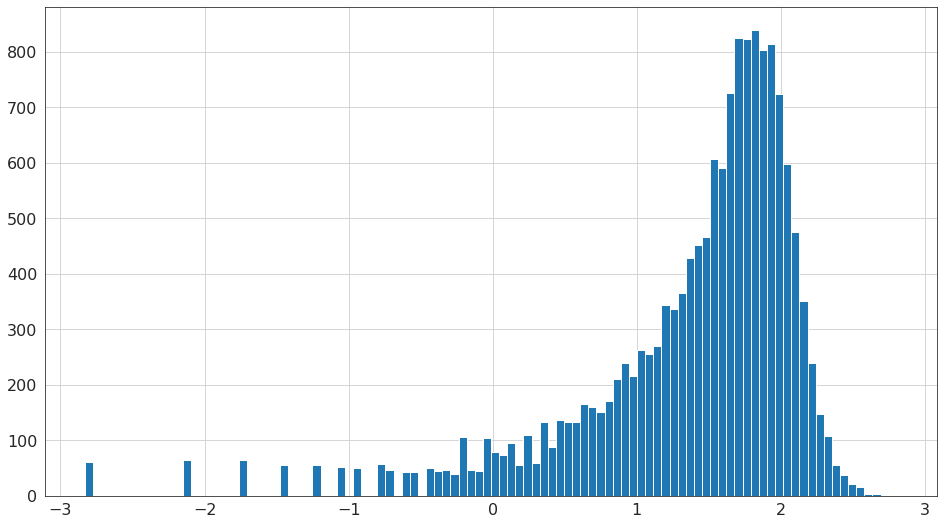

In [28]:
voom_normalized['TCGA-W5-AA36-01'].apply(np.log1p).hist(bins=100,figsize=(16,9))

In [30]:
voom_normalized.head().rank()

,,TCGA-W5-AA36-01,TCGA-W5-AA2H-01,TCGA-ZU-A8S4-11,TCGA-WD-A7RX-01,TCGA-3X-AAVC-01,TCGA-3X-AAVE-01,TCGA-ZH-A8Y4-01,TCGA-W5-AA2W-01,TCGA-W5-AA2Q-11,TCGA-W5-AA2G-01,...,TCGA-ZH-A8Y6-01,TCGA-W6-AA0S-01,TCGA-W5-AA34-11,TCGA-W5-AA2R-11,TCGA-W5-AA33-01,TCGA-W5-AA2U-11,TCGA-YR-A95A-01,TCGA-W5-AA2I-01,TCGA-W5-AA2I-11,TCGA-W5-AA34-01
Name,Description,,,,,,,,,,,,,,,,,,,,,
TSPAN6,ENSG00000000003.13,5.0,2.0,5.0,5.0,5.0,5.0,5.0,3.0,5.0,5.0,...,3.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
DPM1,ENSG00000000419.11,4.0,4.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,...,4.0,4.0,4.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0
SCYL3,ENSG00000000457.12,3.0,3.0,3.0,4.0,3.0,3.0,3.0,5.0,3.0,3.0,...,5.0,2.0,3.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0
C1orf112,ENSG00000000460.15,1.0,1.0,1.0,1.0,1.0,1.0,1.5,2.0,1.0,1.0,...,2.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,2.0
FGR,ENSG00000000938.11,2.0,5.0,2.0,2.0,2.0,2.0,1.5,1.0,2.0,2.0,...,1.0,3.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0


In [81]:
voom_normalized.index[voom_normalized.loc[voom_normalized.index.drop_duplicates(keep='last')].index.duplicated()]

Index(['LYRM9', 'ALKBH6', 'AL445222.1', 'AL358472.2', 'MATR3'], dtype='object', name='Name')

array([False, False, False, ..., False, False, False])

In [104]:
def colwise_distance(df1,df2):
    # this assumes both dataframes have the same index
    diff = df1 - df2
    # Compute the squre root of the mean of squares
    return diff.pow(2).mean().pow(1/2)

def dfdist(df1,df2):
    #Assuming the two dataframes have the same columns
    
    #drop duplicated index...
    df1 = df1.groupby(df1.index).first()
    df2 = df2.groupby(df2.index).first()
    
    #First subset the columns so only shared indexes are accouted for
    df1 = df1.reindex(df2.index).dropna()
    df2 = df2.reindex(df1.index).dropna()
    
    distance_per_column = colwise_distance(df1,df2)
    
    #for now just adding the distance per column
    return distance_per_column.mean()
dfdist(voom_normalized,deseq2)

31454.173741409388